<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Deep Learning School FPMI MIPT</b></h3>


This assignment will be devoted to a full-fledged solution to the problem of machine learning.

# Metric

Before solving any problem, it is important to understand how your solution will be evaluated. In this case, we use the standard ROC-AUC metric for the classification problem. It can be calculated using only predicted probabilities and true classes without a specific classification threshold + it works even if the classes in the data are highly unbalanced (there are dozens of times more examples of one class than examples of the other). That is why it is very convenient for competitions.

It's easy to calculate:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# First part. Study

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load data

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4749,42,25.05,949.85,Male,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,0
5217,12,49.20,571.15,Male,0,Yes,Yes,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
1208,1,78.65,78.65,Female,0,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,1
1719,16,39.00,679.85,Male,1,No,No,No,No phone service,DSL,No,Yes,No,No,Yes,No,Month-to-month,Yes,Mailed check,1
4476,52,103.05,5364.8,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
3244,49,20.70,1032.05,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0
5251,22,59.75,1374.35,Male,0,Yes,No,Yes,No,DSL,Yes,No,No,No,Yes,No,One year,Yes,Bank transfer (automatic),0
2714,72,25.40,1797.1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1979,68,109.05,7508.55,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
3828,31,89.90,2806.9,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,1


In [6]:
df = data.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [8]:
pd.DataFrame(df.isna().sum(), columns = ['Пропусков суммарно']) #sum of passes

,Пропусков суммарно
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [9]:
df.duplicated().sum()

14

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5268 non-null   int64  
 1   MonthlySpending           5268 non-null   float64
 2   TotalSpent                5268 non-null   object 
 3   Sex                       5268 non-null   object 
 4   IsSeniorCitizen           5268 non-null   int64  
 5   HasPartner                5268 non-null   object 
 6   HasChild                  5268 non-null   object 
 7   HasPhoneService           5268 non-null   object 
 8   HasMultiplePhoneNumbers   5268 non-null   object 
 9   HasInternetService        5268 non-null   object 
 10  HasOnlineSecurityService  5268 non-null   object 
 11  HasOnlineBackup           5268 non-null   object 
 12  HasDeviceProtection       5268 non-null   object 
 13  HasTechSupportAccess      5268 non-null   object 
 14  HasOnlin

In [13]:
try:
    df['TotalSpent'] = df['TotalSpent'].astype('float')
except:
    print('Что-то не так!') #something goes wrong!

Что-то не так!


In [14]:
df['TotalSpent'].value_counts()

          9
19.75     8
20.2      7
20.05     5
19.9      5
         ..
950.2     1
4264      1
24.25     1
1090.6    1
1375.6    1
Name: TotalSpent, Length: 4978, dtype: int64

In [15]:
df['TotalSpent'] = df['TotalSpent'].replace(' ', 0.)

In [16]:
df['TotalSpent'].value_counts()

0.0       9
19.75     8
20.2      7
20.05     5
19.9      5
         ..
950.2     1
4264      1
24.25     1
1090.6    1
1375.6    1
Name: TotalSpent, Length: 4978, dtype: int64

In [17]:
df['TotalSpent'] = df['TotalSpent'].astype('float')

In [18]:
df['TotalSpent'] = np.where(df['TotalSpent'] == 0., df['TotalSpent'].median(), df['TotalSpent'])

In [19]:
df['TotalSpent'].value_counts()

1411.50    9
19.75      8
20.20      7
20.05      5
19.90      5
          ..
950.20     1
4264.00    1
24.25      1
1090.60    1
1375.60    1
Name: TotalSpent, Length: 4978, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5268 non-null   int64  
 1   MonthlySpending           5268 non-null   float64
 2   TotalSpent                5268 non-null   float64
 3   Sex                       5268 non-null   object 
 4   IsSeniorCitizen           5268 non-null   int64  
 5   HasPartner                5268 non-null   object 
 6   HasChild                  5268 non-null   object 
 7   HasPhoneService           5268 non-null   object 
 8   HasMultiplePhoneNumbers   5268 non-null   object 
 9   HasInternetService        5268 non-null   object 
 10  HasOnlineSecurityService  5268 non-null   object 
 11  HasOnlineBackup           5268 non-null   object 
 12  HasDeviceProtection       5268 non-null   object 
 13  HasTechSupportAccess      5268 non-null   object 
 14  HasOnlin

## Data analysis


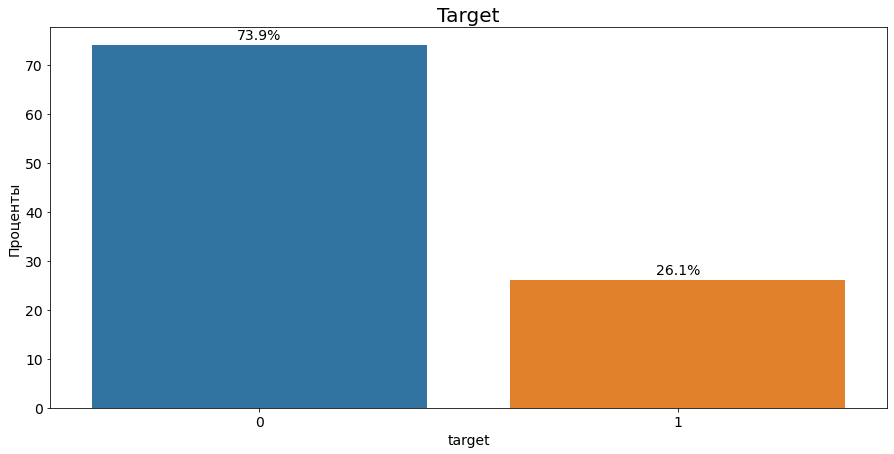

In [21]:
norm_target = (df['Churn'].value_counts(normalize=True).mul(100).rename('percent').reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)

plt.title('Target', fontsize=20)

plt.xlabel('target', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

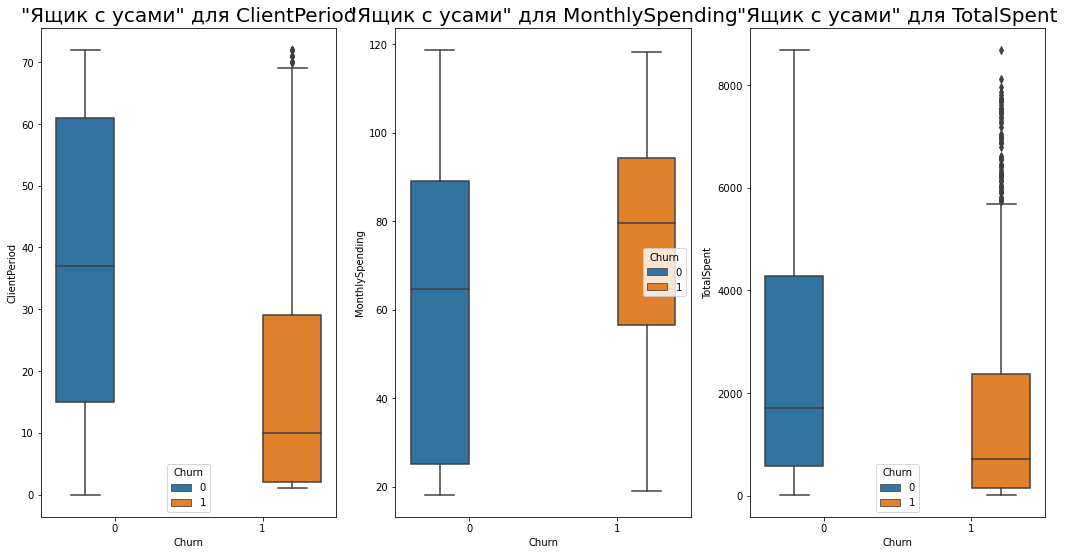

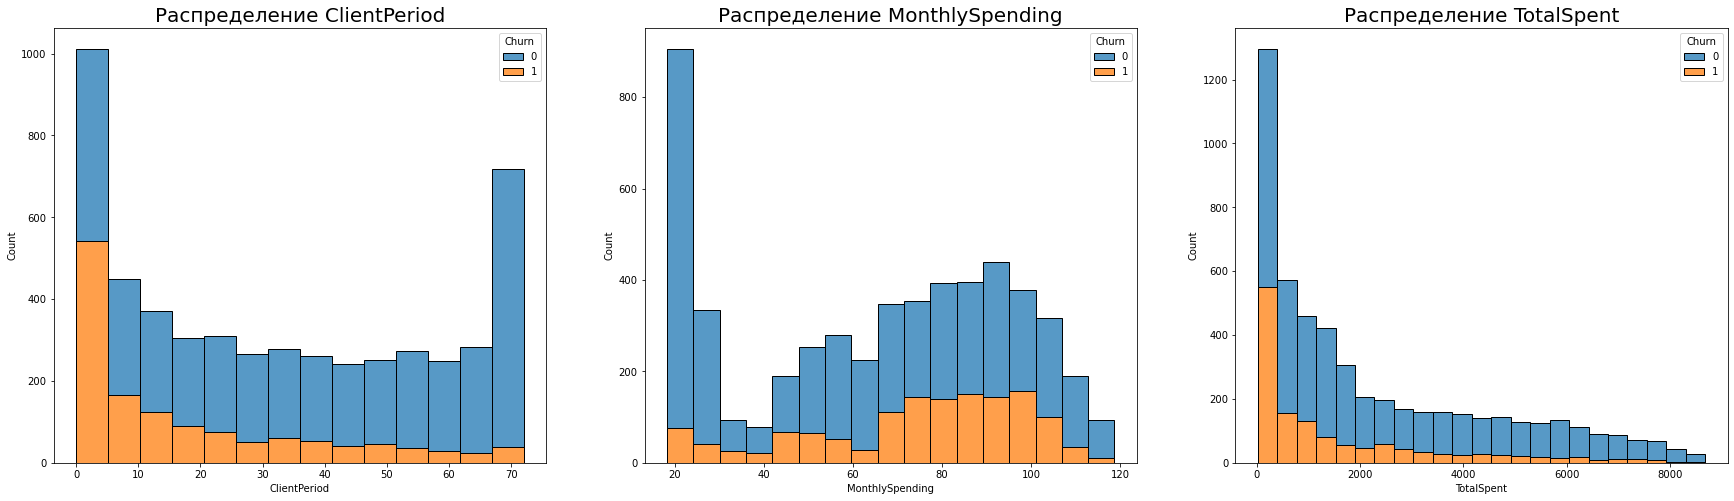

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(18,9))
ax = ax.ravel()
    
for i, v in enumerate(num_cols):
    sns.boxplot(y=v, x='Churn', hue='Churn', data=df, orient='v', ax=ax[i])
    ax[i].set_title('"Ящик с усами" для ' + v, fontsize=20)
fig.show()

fig, ax = plt.subplots(1, 3, figsize=(30,8))
ax = ax.ravel()

for i, v in enumerate(num_cols):
    sns.histplot(data=df, x=v, hue='Churn', multiple='stack', ax=ax[i])
    ax[i].set_title('Распределение ' + v, fontsize=20)
fig.show()


In [23]:
pd.set_option('display.max_colwidth', 1000)

In [24]:
out = list()
for column in cat_cols:
    out.append([column, df[column].nunique(), dict(df[column].value_counts())])
pd.DataFrame(out, columns=['column', 'num_uniq', 'count_uniq'])

,column,num_uniq,count_uniq
0,Sex,2,"{'Male': 2647, 'Female': 2621}"
1,IsSeniorCitizen,2,"{0: 4427, 1: 841}"
2,HasPartner,2,"{'No': 2691, 'Yes': 2577}"
3,HasChild,2,"{'No': 3662, 'Yes': 1606}"
4,HasPhoneService,2,"{'Yes': 4747, 'No': 521}"
5,HasMultiplePhoneNumbers,3,"{'No': 2497, 'Yes': 2250, 'No phone service': 521}"
6,HasInternetService,3,"{'Fiber optic': 2335, 'DSL': 1798, 'No': 1135}"
7,HasOnlineSecurityService,3,"{'No': 2604, 'Yes': 1529, 'No internet service': 1135}"
8,HasOnlineBackup,3,"{'No': 2324, 'Yes': 1809, 'No internet service': 1135}"
9,HasDeviceProtection,3,"{'No': 2309, 'Yes': 1824, 'No internet service': 1135}"


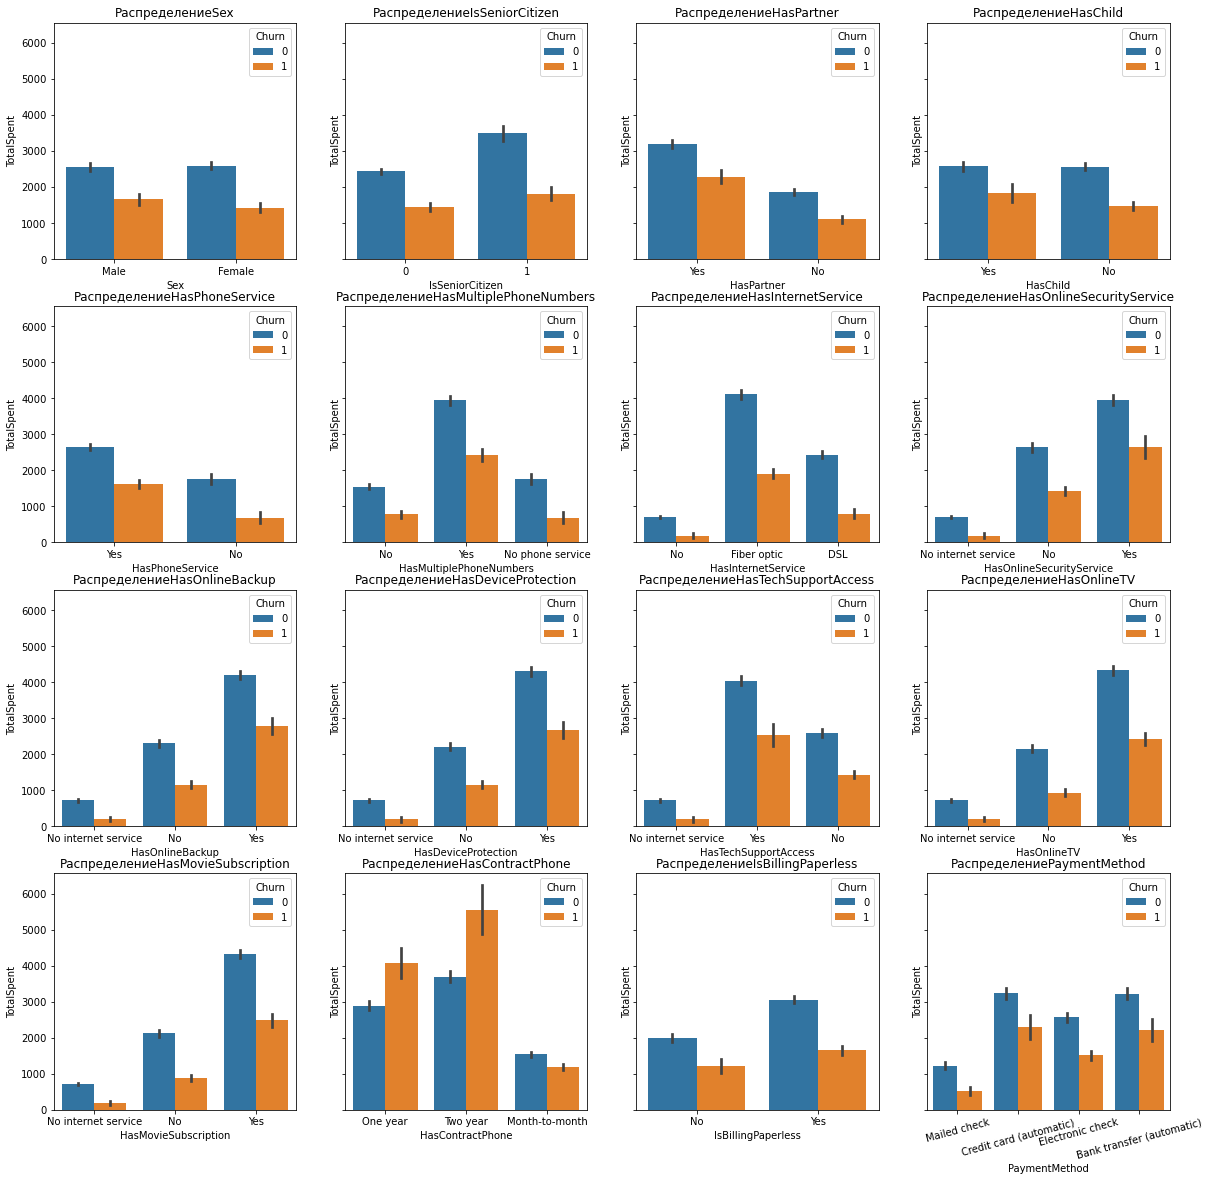

In [25]:
fig, ax = plt.subplots(4, 4, figsize=(20,20), sharey=True)
ax = ax.ravel()
    
for i, v in enumerate(cat_cols):
    sns.barplot(data=df, x=v, y='TotalSpent', hue='Churn', ax=ax[i])
    ax[i].set_title('Распределение' + v, fontsize=12)
    if i ==15:
        ax[i].tick_params(labelrotation=15)
fig.show()

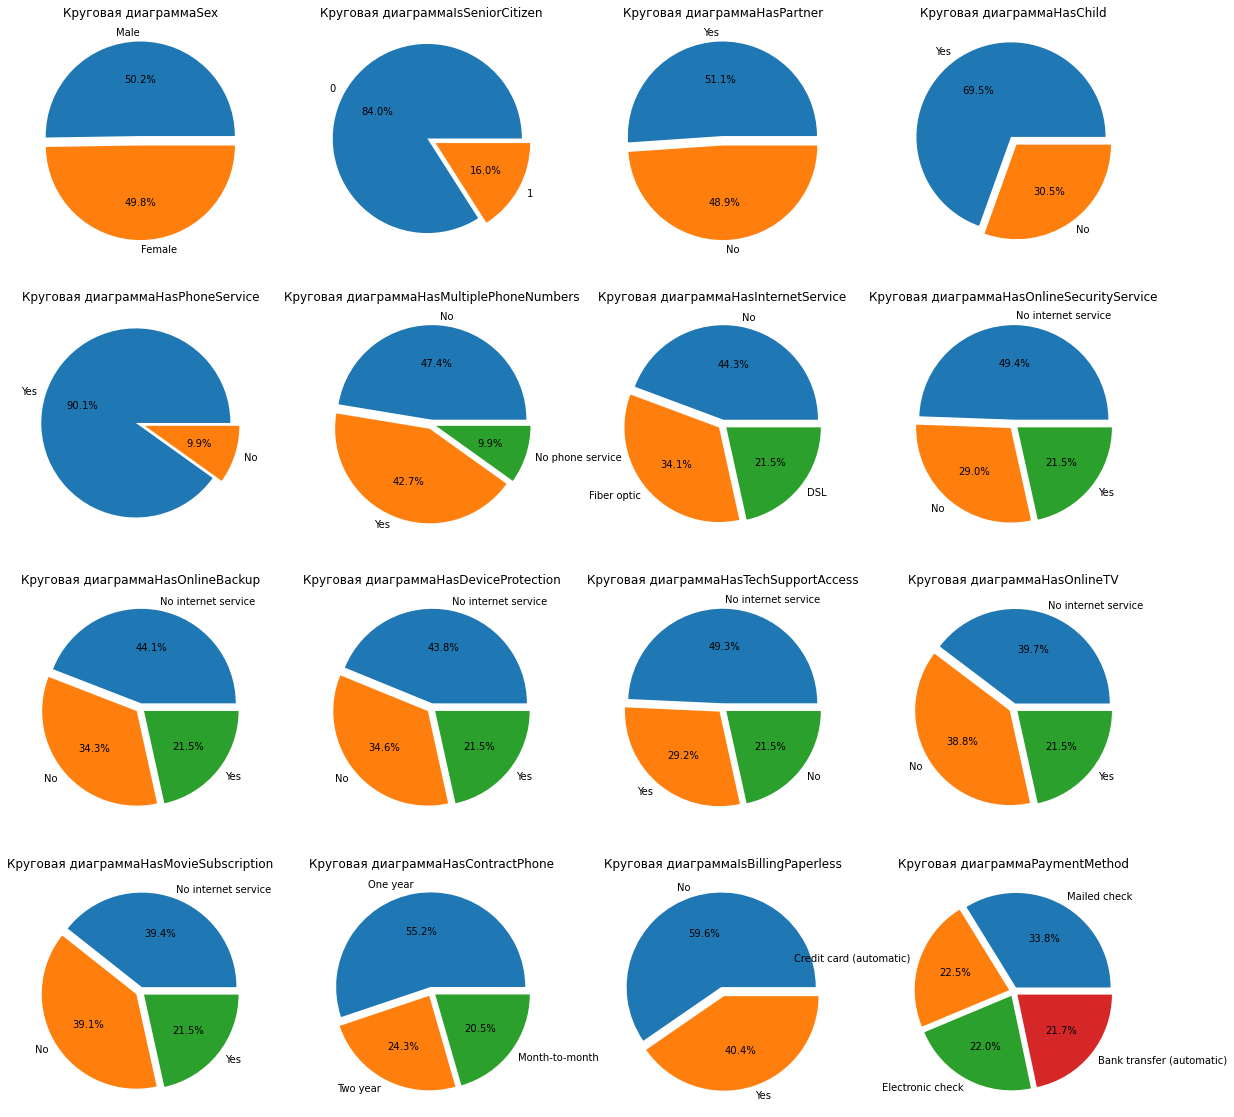

In [26]:
fig, ax = plt.subplots(4, 4, figsize=(20,20))
ax = ax.ravel()

for i, v in enumerate(cat_cols):
    ax[i].pie(df[v].value_counts(), labels = df[v].unique(), explode = [0.05]*len(df[v].unique()), autopct='%1.1f%%')
    ax[i].set_title('Круговая диаграмма' + v, fontsize=12)
fig.show()


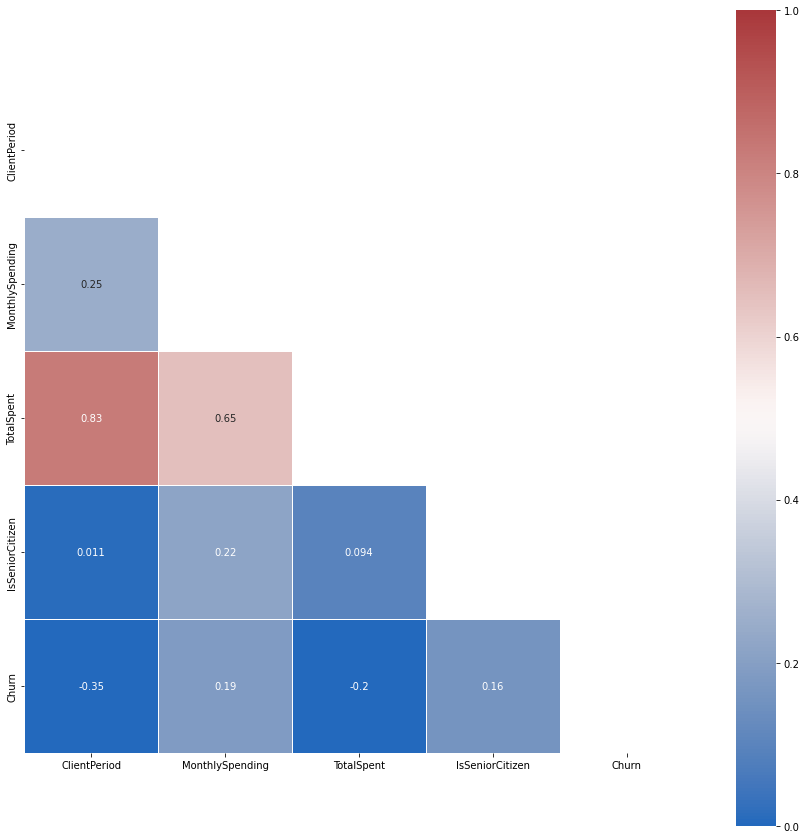

In [27]:
plt.subplots(figsize=(15, 15))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
cmap = 'vlag'
sns.heatmap(df.corr(),mask=mask, cmap=cmap,
            vmin=0, vmax=1,  annot=True, linewidths=.5, square=True)
plt.show()

In [28]:
df.corr()['Churn'].reset_index().sort_values(by='Churn', ascending=False).style.background_gradient()

,index,Churn
4,Churn,1.000000
1,MonthlySpending,0.185915
3,IsSeniorCitizen,0.157751
2,TotalSpent,-0.198943
0,ClientPeriod,-0.348881


## Linear models implementation


In [29]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [30]:
dummy_features = pd.get_dummies(df[cat_cols], drop_first=True)
X = pd.concat([df[num_cols], dummy_features], axis=1)
y = df[target_col]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4214, 30) (4214,) (1054, 30) (1054,)


In [33]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [34]:
clf = LogisticRegressionCV(class_weight='balanced', random_state=42)

In [35]:
%%time
grid_cv = GridSearchCV(clf, param_grid={
                                    'penalty': ['l1', 'l2', 'elasticnet'],
                                    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
                                    },
                      scoring='roc_auc',
                      refit=True,
                      n_jobs=-1,
                      verbose=-1)
grid_cv.fit(X_train, y_train)

print(f"Параметры: {grid_cv.best_params_}")

Параметры: {'penalty': 'l2', 'solver': 'lbfgs'}
Wall time: 14.1 s


In [36]:
clf = LogisticRegressionCV(class_weight='balanced', penalty='l2', solver='lbfgs', random_state=42)
clf.fit(X_train, y_train)

LogisticRegressionCV(class_weight='balanced', random_state=42)

In [37]:
from sklearn.metrics import roc_curve, auc

In [38]:
y_train_predicted = clf.predict_proba(X_train)[:, 1]
y_test_predicted = clf.predict_proba(X_test)[:, 1]

In [39]:
print("ROC-AUC:"); print("="*len("ROC-AUC:"))
print(f"TRAIN: {roc_auc_score(y_train, y_train_predicted)}")
print(f"TEST: {roc_auc_score(y_test, y_test_predicted)}")

ROC-AUC:
TRAIN: 0.846624099707644
TEST: 0.8430043321532321


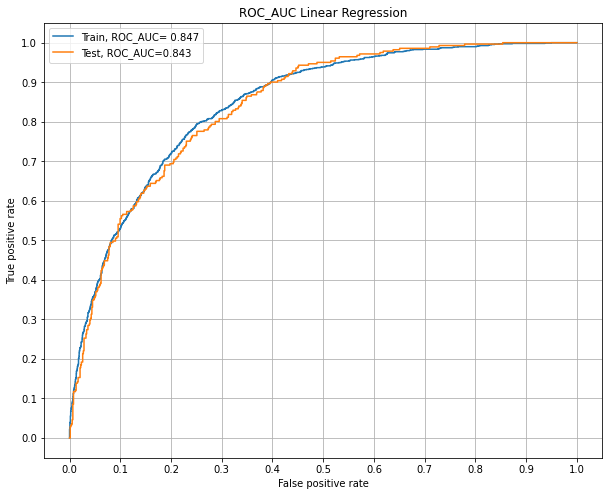

In [56]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(*roc_curve(y_train, y_train_predicted)[:2], label='Train, ROC_AUC= {:.3}'.format(roc_auc_score(y_train, y_train_predicted)))
ax.plot(*roc_curve(y_test, y_test_predicted)[:2], label='Test, ROC_AUC={:.3}'.format(roc_auc_score(y_test, y_test_predicted)))

ax.legend()
ax.set(xlabel='False positive rate', ylabel='True positive rate', title=f'ROC_AUC Linear Regression')
ax.grid()
ax.set_yticks(np.linspace(0, 1, 11))
ax.set_xticks(np.linspace(0, 1, 11));

## Gradient boosting implementation

In [41]:
from catboost import CatBoostClassifier

In [42]:
X = df[num_cols+cat_cols]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
params = {'depth': np.linspace(2, 4, 3),
         'learning_rate': np.linspace(0.01, 0.05, 5),
         'random_state': [42]}

cb_clf = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC:hints=skip_train~false', logging_level='Silent', early_stopping_rounds=100)
search = cb_clf.grid_search(params, X_train, y_train, cv=5)
print(search['params'])
print(f'Test ROC-AUC: {roc_auc_score(y_test, cb_clf.predict_proba(X_test)[:, 1])}')

0:	loss: 0.8474646	best: 0.8474646 (0)	total: 5.76s	remaining: 1m 20s
1:	loss: 0.8419853	best: 0.8474646 (0)	total: 6.76s	remaining: 43.9s
2:	loss: 0.8481581	best: 0.8481581 (2)	total: 11.2s	remaining: 45s
3:	loss: 0.8497089	best: 0.8497089 (3)	total: 14s	remaining: 38.6s
4:	loss: 0.8494765	best: 0.8497089 (3)	total: 16.6s	remaining: 33.2s
5:	loss: 0.8486763	best: 0.8497089 (3)	total: 26.9s	remaining: 40.4s
6:	loss: 0.8494612	best: 0.8497089 (3)	total: 35.5s	remaining: 40.5s
7:	loss: 0.8486382	best: 0.8497089 (3)	total: 40.6s	remaining: 35.5s
8:	loss: 0.8502309	best: 0.8502309 (8)	total: 46s	remaining: 30.7s
9:	loss: 0.8496479	best: 0.8502309 (8)	total: 50.5s	remaining: 25.2s
10:	loss: 0.8503300	best: 0.8503300 (10)	total: 1m 2s	remaining: 22.9s
11:	loss: 0.8499261	best: 0.8503300 (10)	total: 1m 11s	remaining: 17.8s
12:	loss: 0.8503224	best: 0.8503300 (10)	total: 1m 16s	remaining: 11.8s
13:	loss: 0.8492326	best: 0.8503300 (10)	total: 1m 20s	remaining: 5.78s
14:	loss: 0.8509472	best: 0.

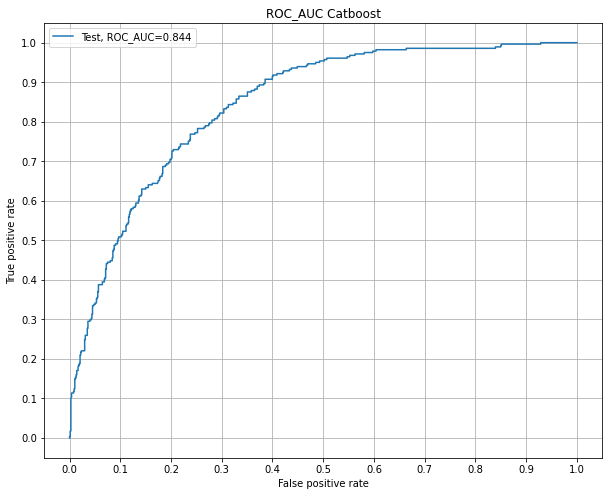

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(*roc_curve(y_test, cb_clf.predict_proba(X_test)[:, 1])[:2], label='Test, ROC_AUC={:.3}'.format(roc_auc_score(y_test, cb_clf.predict_proba(X_test)[:, 1])))

ax.legend()
ax.set(xlabel='False positive rate', ylabel='True positive rate', title=f'ROC_AUC Catboost')
ax.grid()
ax.set_yticks(np.linspace(0, 1, 11))
ax.set_xticks(np.linspace(0, 1, 11))
plt.show()

Best results:

In [59]:
pd.DataFrame({'Модель': ['LinearRegression', 'CatBoost'],
             'Качество предсказания': [0.84, 0.84],
             'Параметры':['penalty: l2, solver: lbfgs', 'depth: 4.0, learning_rate: 0.05']})

,Модель,Качество предсказания,Параметры
0,LinearRegression,0.84,"penalty: l2, solver: lbfgs"
1,CatBoost,0.84,"depth: 4.0, learning_rate: 0.05"


# Predictions

In [45]:
best_model = CatBoostClassifier(cat_features=cat_cols,random_seed=42, depth=4.0,learning_rate=0.05, eval_metric='AUC:hints=skip_train~false', logging_level='Silent')
best_model.fit(X_train, y_train)

In [64]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle results

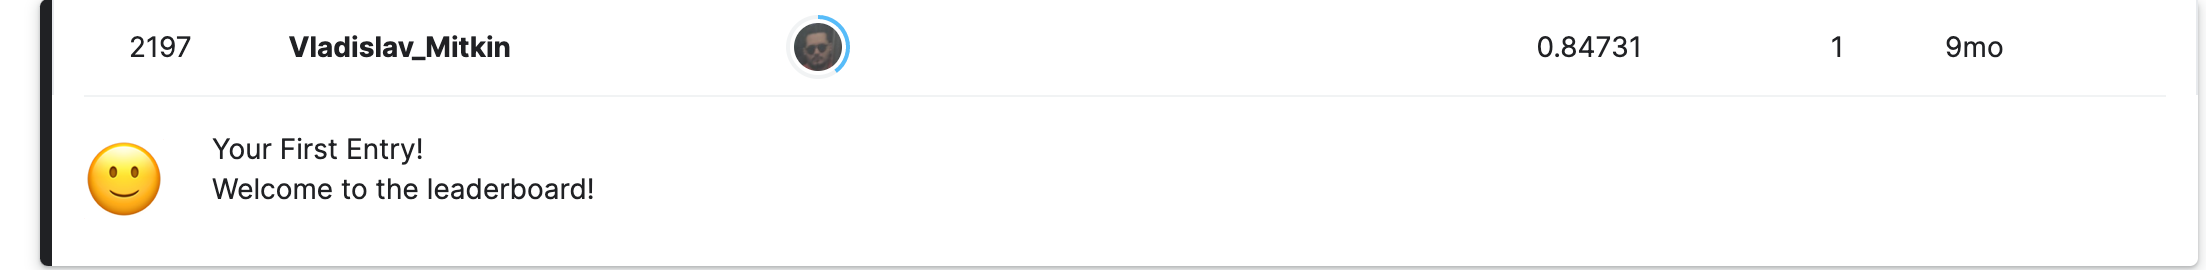